In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

## Exploratory Data Analysis

In [3]:
## Loading the data set

df = pd.read_csv("..//listings.csv", sep = ',', header = 0, encoding = 'unicode_escape')

In [4]:
#1. How many samples and features does each file have?
print("There are " + str(df.shape[0]) + " samples and " + str(df.shape[1]) + " features in the dataset.")

There are 9582 samples and 67 features in the dataset.


In [5]:
#2. What are the types of the features?
print(df.dtypes)

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 67, dtype: object


In [6]:
#3. Are there any missing values? If yes, how many and how many rows are affected?
print("Total NaN values: " + str(df.isna().sum().sum()))

count = 0
for i in df.isna().sum(axis = 1):
    if i > 0:
        count+=1
print("Total rows containing NaN: " + str(count))


Total NaN values: 56123
Total rows containing NaN: 9582


In [7]:
#4. How many listings per neighbourhood are there?
print(df.neighbourhood_cleansed.value_counts())

£ª®­¯§¨­ ±¯§¡¶«­-®©¨                       1866
¨­²¨¨§-ª¨¯²¡§««¥                             841
«£­° ¨­°ª­°                                             713
ª­²°£§­-£¬¯´£§-«£®­©¥                    699
¡§­° ¨¶«°±«±§«­°-®©±£§  ¦¥°     599
®¡¨¯±§                                                  383
®©±£§ ±±§¨¥°                                     381
¨­©¶«¨§                                                  330
ª®£©­¨¥®­§                                            329
¨¯­®­©¥                                                  319
¦¥°£§­                                                      294
¨£¯ª£§¨­°                                              244
°±¢§­                                                      223
®£±¯©¶«                                                214
¨²µ£©¥        

In [8]:
#5. How many listings per room type are there?
print(df.room_type.value_counts())

Entire home/apt    8463
Private room        891
Hotel room          138
Shared room          90
Name: room_type, dtype: int64


In [9]:
#6. How many listings per number of rooms are there?
print(df.bedrooms.value_counts())

1.0     5483
2.0     2579
3.0      507
4.0      132
5.0       29
6.0       28
10.0       5
7.0        4
9.0        1
12.0       1
Name: bedrooms, dtype: int64


The distribution can be seen here:
The user with most listings has 156 listings.


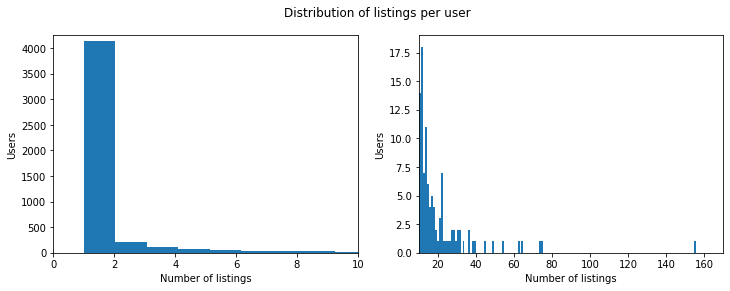

In [10]:
#7. What is the distribution of listings per host? What are the most listings that a single host has?
import matplotlib.pyplot as plt

listings = df.host_id.value_counts()
print("The distribution can be seen here:")
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12, 4)
fig.suptitle("Distribution of listings per user")
axs[0].hist(listings, bins = 150)
axs[0].set_ylabel("Users")
axs[0].set_ylim([0,4250])
axs[0].set_xlabel("Number of listings")
axs[0].set_xlim([0,10])
axs[1].hist(listings, bins = 150)
axs[1].set_ylabel("Users")
axs[1].set_ylim([0,19])
axs[1].set_xlabel("Number of listings")
axs[1].set_xlim([10,170])
print("The user with most listings has " + str(listings.max()) + " listings.")

In [11]:
#8. When was the first host registered?
a = pd.to_datetime(df.host_since).sort_values(ascending=True)[0]
print("The first host was registered on " + str(a.day) +' '+ a.month_name() +' '+ str(a.year) +'.')

The first host was registered on 8 September 2009.


In [12]:
#9. What year had the most hosts registered?
s = pd.to_datetime(df.host_since).apply(lambda x: x.year)
max_hosts = s.value_counts().max()
y = int(s.value_counts()[s.value_counts() == max_hosts].index.values[0])
print("Most hosts registered in " + str(y) + '.')

Most hosts registered in 2018.


In [13]:
#10. How many identified hosts are there? What is their percentage over all hosts?
ivh = df.loc[df.host_identity_verified == 't'].shape[0]
perc = round(ivh*100/df.shape[0]*100)/100
print("There are "+str(ivh)+" verified hosts and that is "+str(perc)+"% of the whole.")

There are 6928 verified hosts and that is 72.3% of the whole.


In [14]:
#11. What are the top-20 most common amenities provided by the hosts?
s = df.loc[:,"amenities"].apply(lambda x: x.replace('"', ''))
s = s.apply(lambda x: x.split('[')[1]).apply(lambda x: x.split(']')[0]).apply(lambda x: x.split(', '))

amenities_all = []
for row in s:
    for amen in row:
        amenities_all.append(amen)
s = pd.Series(amenities_all)
print(s.value_counts().sort_values(ascending=False)[:20])

temp_s = s.apply(lambda x: len(x))

Essentials                 9078
Hair dryer                 8774
Wifi                       8756
Long term stays allowed    8696
Air conditioning           8670
Hangers                    8581
Kitchen                    8467
Iron                       8246
Shampoo                    8059
Heating                    7609
Hot water                  7312
TV                         6800
Dishes and silverware      6794
Cooking basics             6729
Refrigerator               6433
Coffee maker               6291
Dedicated workspace        6282
Bed linens                 5894
Washer                     5480
Elevator                   5465
dtype: int64


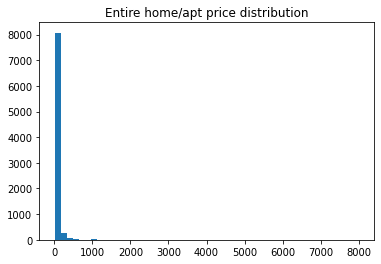

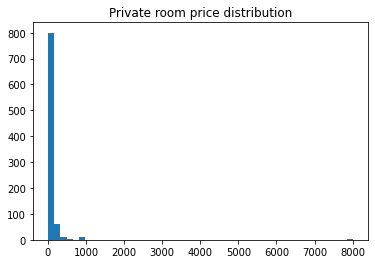

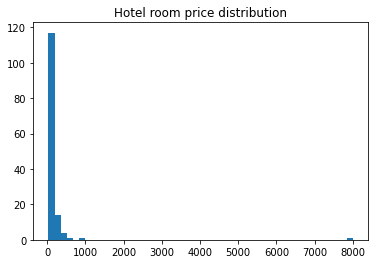

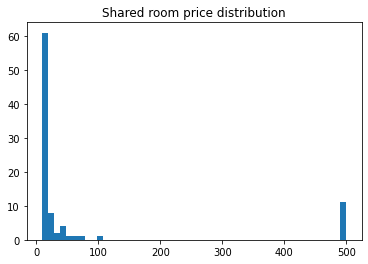

In [15]:
#12. What is the distribution of price for each room type?
def process_price(x):
    temp = x.split('$')[1]
    temp = temp.replace(',','')
    return float(temp)

p = df.price.apply(process_price)
df2 = pd.DataFrame({"room_type":df.room_type, "price": p })
s = df2.room_type.value_counts()

for rt in s.index.values:
    plt.hist(df2.loc[df.room_type == rt,"price"],bins=50)
    plt.title(rt + " price distribution")
    plt.show()


## Preprocessing

In [16]:
#Load the dataset and look at its dimentions

df = pd.read_csv("..//listings.csv", sep = ',', header = 0, encoding = 'unicode_escape')
df.shape

(9582, 67)

In [17]:
#Drop seemingly unnecessary/useless features

drop = ["id","host_id","listing_url","scrape_id","last_scraped","name","description",'neighborhood_overview',"picture_url","host_url",
    "host_name","host_location","host_about","host_thumbnail_url","host_picture_url","host_verifications",
    "neighbourhood","neighbourhood_group_cleansed","bathrooms", 'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights',
    'maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm', "calendar_updated",
    "calendar_last_scraped","first_review","license","calculated_host_listings_count","bedrooms","beds","last_review","calculated_host_listings_count",
    "calculated_host_listings_count_entire_homes","calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms",
    "host_neighbourhood","host_total_listings_count","property_type","host_acceptance_rate"]
df2 = df.drop(labels=drop, axis=1)
df2.shape

(9582, 27)

In [18]:
#Keeping the length of amenities feature, instead of the list of strings.

print(df2.loc[:5,"amenities"])
# Split and count elements in each list of strings.
s = df2.loc[:,"amenities"].apply(lambda x: x.split(', ')).apply(lambda x: len(x))
df2.loc[:,"amenities"] = s
print(df2.loc[:5,"amenities"])

0    ["Kitchen", "Free street parking", "Crib", "Pa...
1    ["Kitchen", "Luggage dropoff allowed", "Free s...
2    ["Kitchen", "Free street parking", "Patio or b...
3    ["Kitchen", "Free street parking", "Patio or b...
4    ["Kitchen", "Free street parking", "Crib", "Pa...
5    ["Kitchen", "Luggage dropoff allowed", "Body s...
Name: amenities, dtype: object
0    33
1    33
2    30
3    32
4    33
5    44
Name: amenities, dtype: int64


In [19]:
## Turning bathroom_texts into 2 more useful features, the actual number of bathrooms and if it is shared or not.
    
# Fill NaN values with 0, assuming the listing has no bath.
df2.bathrooms_text.fillna(value = '0 baths', inplace = True)
# Create three new columns.
bathrooms = []                  # 'bathrooms' will hold the amount of bathrooms the listing has. 
shared_bath = []                # 'shared_bath' for if the bathrooms are shared.
 
for text in df2.bathrooms_text:
    text = text.lower()
 
    if 'shared' in text:
        shared_bath.append(1)
    else:
        shared_bath.append(0)

    half_flag = False
    if 'half-bath' in text:
        half_flag = True
 
    text = text.split()
 
    try:
        baths = float(text[0])
        if half_flag:
            baths += 0.5
        bathrooms.append(baths)        
    except:
        bathrooms.append(0)
 
df2['bathrooms'] = bathrooms
df2['shared_bath'] = shared_bath
df2.drop("bathrooms_text", axis=1,inplace=True)

In [20]:
#Cleaning and renaming "price" feature to "target". Also moving it in the last place.

df2.insert(len(df2.columns),"target",df2.price.apply(process_price))
df2.drop("price", axis = 1, inplace=True)

In [21]:
#keeping only the year info from the "host_since" feature

df2.host_since = pd.to_datetime(df2.host_since)
df2.host_since = df2.host_since.apply(lambda x: x.year)

In [22]:
# Filling NaN values of "reviews_per_month" with 0, assuming there are none.

df2.loc[df2.reviews_per_month.isna(),"reviews_per_month"] = 0
df2.reviews_per_month.isna().sum()

0

In [23]:
#Encoding "room_type" feature in a scaling order.

map_dict = {"Entire home/apt":3, "Private room":2,"Hotel room":1,"Shared room":0}
df2.loc[:,"room_type"] = df2.loc[:,"room_type"].map(map_dict)

In [24]:
#Encoding "host_response_time" feature in a scaling order. Also filling NaN
#values with 0, assuming there is no response and thus no response time.

df2.host_response_time.fillna(value="0",inplace=True)
map_dict = {"within an hour":4,"within a few hours":3,"within a day":2,"a few days or more":1, "0":0}
df2.loc[:,"host_response_time"] = df2.loc[:,"host_response_time"].map(map_dict)

In [25]:
#Filling NaN values of "host_response_rate" with 0% assuming there is no response rate.
#Also we keep only the numeric part of the data as a float.

df2.host_response_rate.fillna(value='0%',inplace=True)
df2.host_response_rate = df2.host_response_rate.apply(lambda x: float(x.split('%')[0]))

In [26]:
#Encoding Bolean features into '0' and '1'.

map_dict = {'t':1,'f':0}
df2.instant_bookable = df2.instant_bookable.map(map_dict)
df2.has_availability = df2.has_availability.map(map_dict)
df2.host_is_superhost = df2.host_is_superhost.map(map_dict)
df2.host_has_profile_pic = df2.host_has_profile_pic.map(map_dict)
df2.host_identity_verified = df2.host_identity_verified.map(map_dict)

In [27]:
#Drop any remaining lines with even 1 NaN value. (3 total)

print("Dataset dimensions before:", df2.shape)
df2.dropna(how='any',inplace=True)
df2.reset_index(drop = True, inplace = True)
print("Dataset dimensions after:", df2.shape)

Dataset dimensions before: (9582, 28)
Dataset dimensions after: (9579, 28)


In [28]:
## Handling of latitude, longitude

"""cluster_num = 100
 
X = df2.loc[:,['latitude', 'longitude']]
 
# Create clusters with K-Means.
kmeans = KMeans(n_clusters = cluster_num)
X['cluster'] = kmeans.fit_predict(X)
X['cluster'] = X['cluster'].astype('category')
 
# Visualize.
#sns.relplot(x = 'longitude', y = 'latitude', hue = 'cluster', data = X, height = 7)

df2.insert(10,"cluster",X['cluster'])"""



'cluster_num = 100\n \nX = df2.loc[:,[\'latitude\', \'longitude\']]\n \n# Create clusters with K-Means.\nkmeans = KMeans(n_clusters = cluster_num)\nX[\'cluster\'] = kmeans.fit_predict(X)\nX[\'cluster\'] = X[\'cluster\'].astype(\'category\')\n \n# Visualize.\n#sns.relplot(x = \'longitude\', y = \'latitude\', hue = \'cluster\', data = X, height = 7)\n\ndf2.insert(10,"cluster",X[\'cluster\'])'

In [29]:
#Encoding "neighbourhood_cleansed" using the frequency of each value.

map_dict = df2.neighbourhood_cleansed.value_counts().to_dict()
df2.neighbourhood_cleansed = df2.neighbourhood_cleansed.map(map_dict)

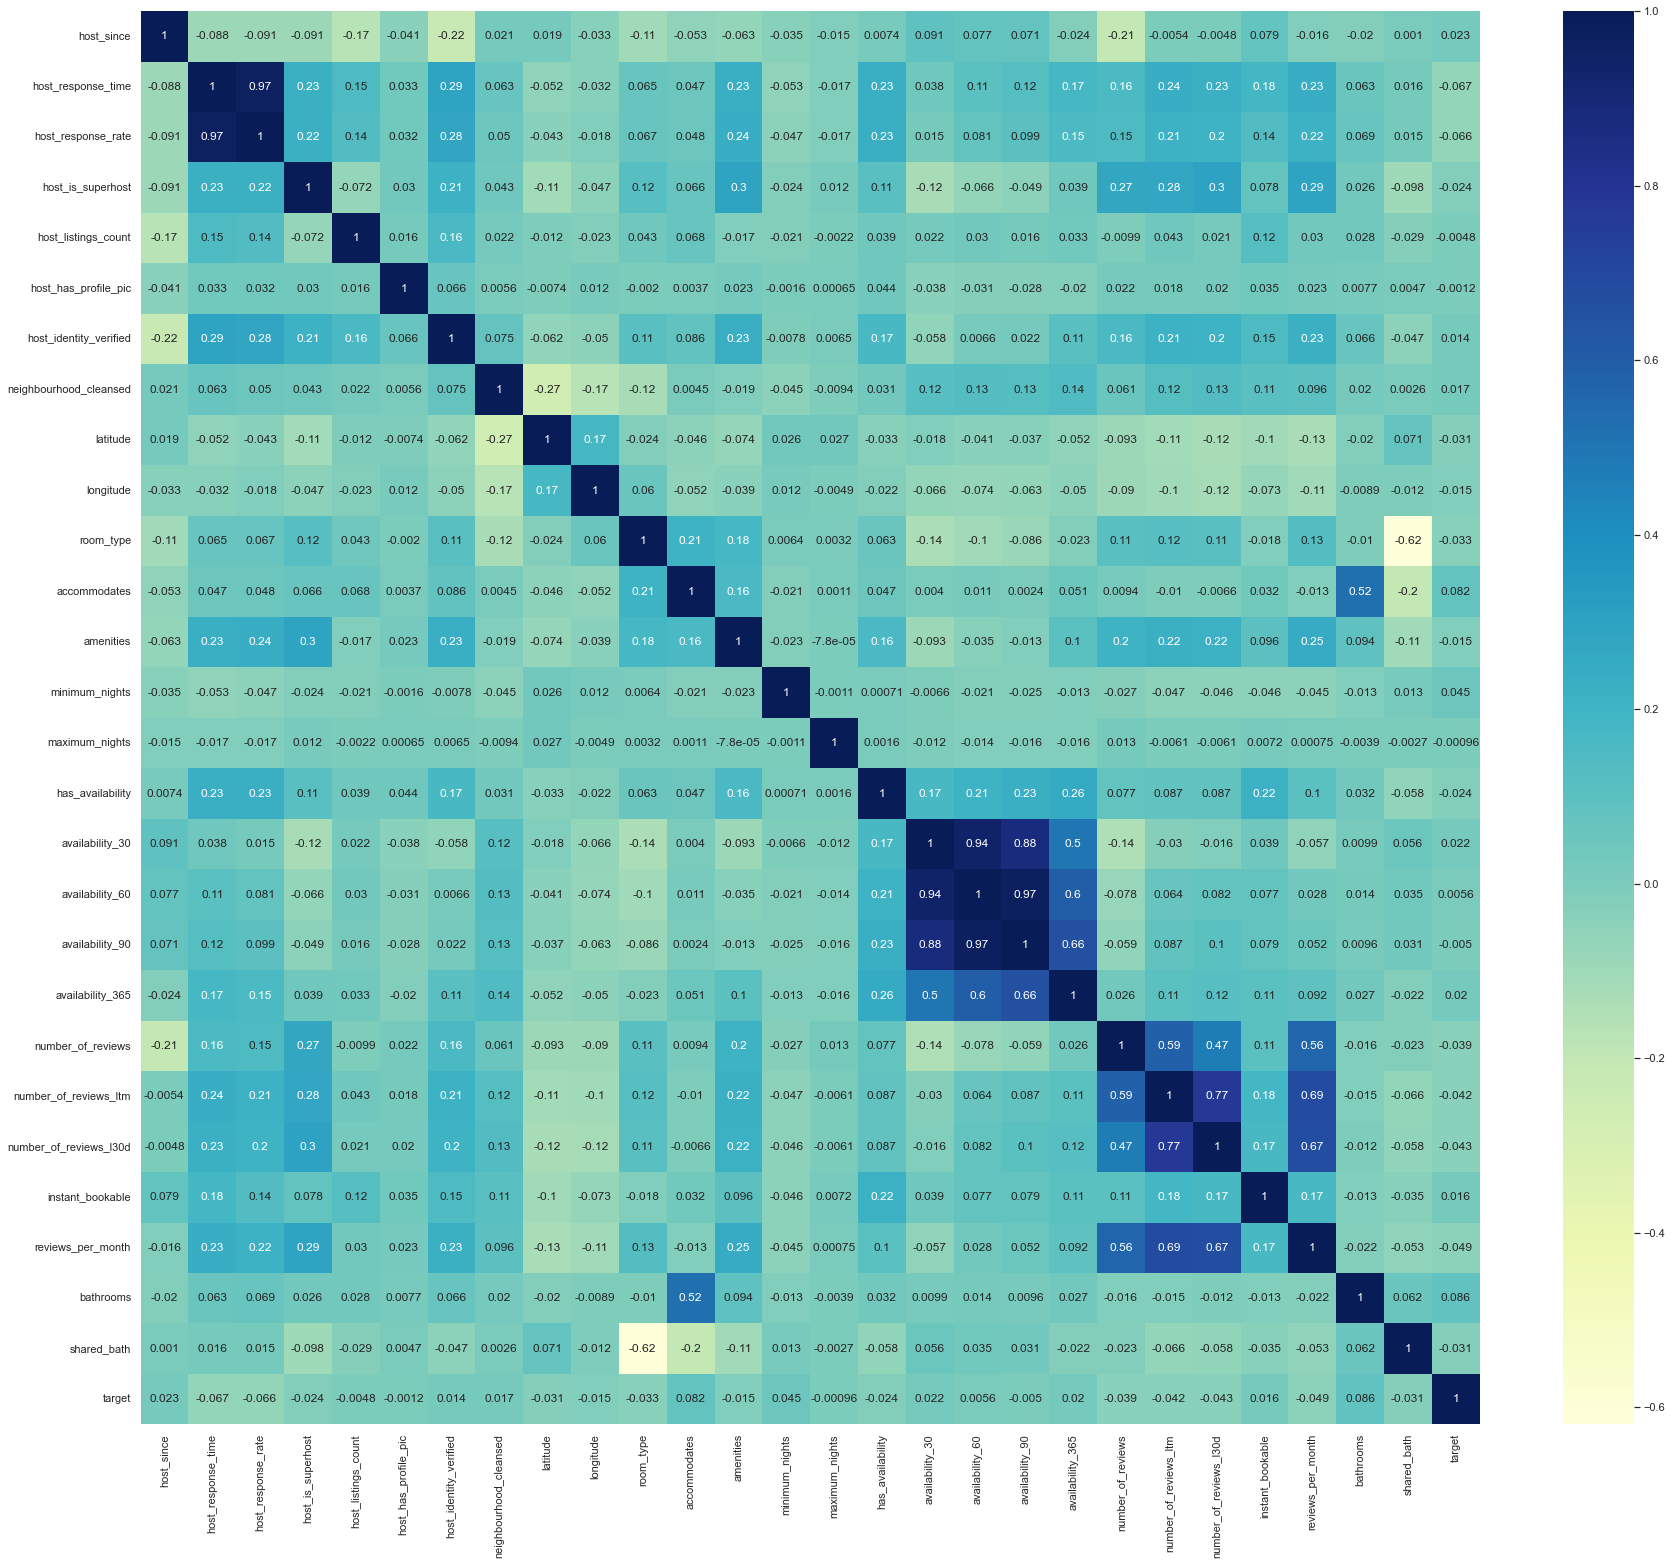

In [30]:
#Ploting the correlation heatmap to determine the most informative features.

sns.set(rc={"figure.figsize":(30, 26)})
sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
sns.set(rc={"figure.figsize":(16, 9)})

In [31]:
#Keeping the names of all the features we encoded, in a list.

enc_features = ["host_response_time","host_is_superhost","host_has_profile_pic","host_identity_verified","room_type", 'has_availability','instant_bookable', 'shared_bath']

In [32]:
#Identifying the features with correlation to "target" > =0.03.

correlation_values = df2.corr().iloc[:,-1].values
names = []
vals = []
for i,val in enumerate(correlation_values):
    if abs(val) >= .03:
        names.append(df2.columns[i])
        vals.append(val)
# Saving as a dataframe and sorting by absolute correlation value
df3 = pd.DataFrame({"feature":names,"correlation":vals,"abs":np.abs(vals)}).sort_values(by="abs").reset_index(drop=True).drop("abs",axis=1)
print(df3.head())

                 feature  correlation
0               latitude    -0.030547
1            shared_bath    -0.031185
2              room_type    -0.032930
3      number_of_reviews    -0.038594
4  number_of_reviews_ltm    -0.041705


In [33]:
#Create a dataframe containing all encoded features and those with corr >= 0.03.
alt_names = df3.feature.values
for i in enc_features:
    if i not in alt_names:
        alt_names = np.append(alt_names,i)
df4 = df2.loc[:,alt_names].copy()  #df4 contains features with >=0.03 corr AND all encoded features.
df4 = df2.drop("target", axis = 1)
df4.insert(df4.shape[1], "target", df2.loc[:,"target"])
df4.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'accommodates', 'amenities', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'instant_bookable', 'reviews_per_month', 'bathrooms', 'shared_bath',
       'target'],
      dtype='object')

In [34]:
#Create a dataframe containing only the features with corr >= 0.03.

df2 = df2.loc[:,df3.feature] #Keep only features with corr >=0.03 with the taget variable.
df2.columns

Index(['latitude', 'shared_bath', 'room_type', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'minimum_nights',
       'reviews_per_month', 'host_response_rate', 'host_response_time',
       'accommodates', 'bathrooms', 'target'],
      dtype='object')

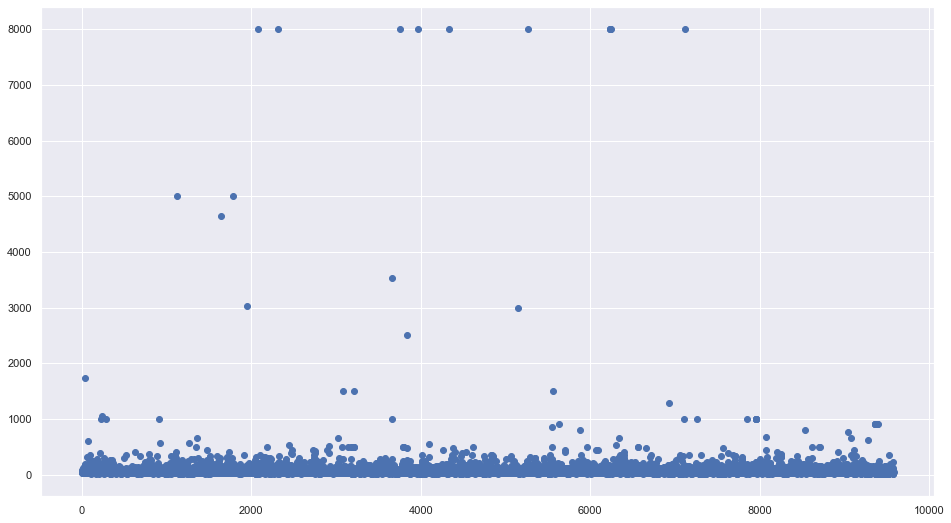

In [35]:
# Visualizing outliers

plt.scatter(range(df2.shape[0]),df2.target)
plt.show()

Outliers (th=200):  359 = 3.75 %


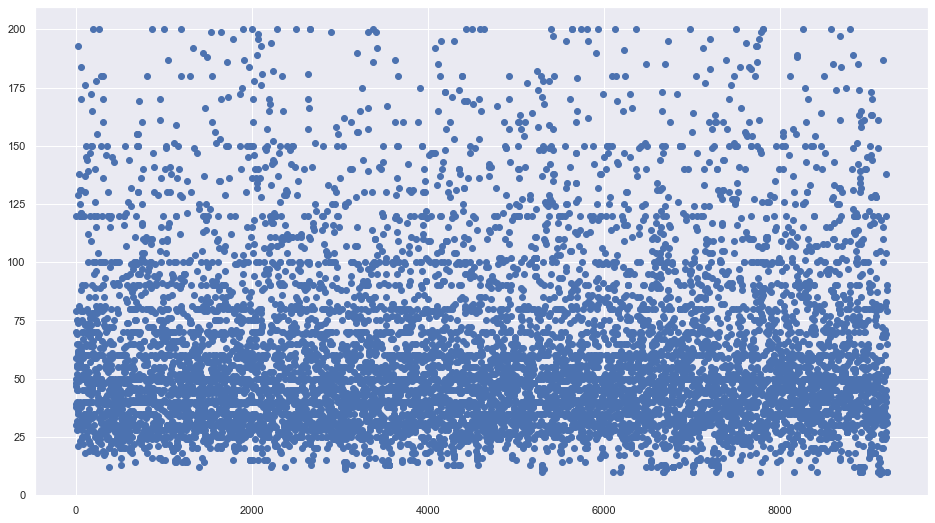

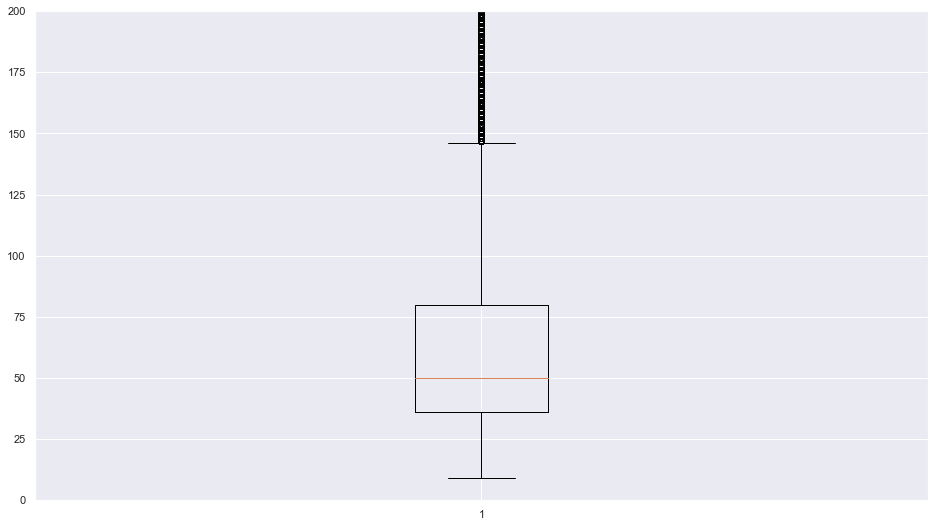

In [36]:
# Based on the above saterplot we se a threshold value for price
threshold = 200

plt.scatter(range(df2.loc[df2.target <= threshold,"target"].shape[0]),df2.loc[df2.target <= threshold,"target"])
print("Outliers (th="+str(threshold)+"): ",df2.loc[df2.target > threshold,"target"].shape[0],"=",round(df2.loc[df2.target > threshold,"target"].shape[0]*100/df2.shape[0]*100)/100,"%")
plt.show()

plt.boxplot(df2.target)
plt.ylim([0, threshold])
plt.show()

From the above box plot we can see that the actual threshold to classify an observation as an outlier should be in fact even lower, and thus a threshold price of 150 is selected. Only samples with a price <= 150 will be used for training our models in the next step.

In [37]:
threshold = 150
print("Outliers (th="+str(threshold)+"): ",df2.loc[df2.target > threshold,"target"].shape[0],"=",round(df2.loc[df2.target > threshold,"target"].shape[0]*100/df2.shape[0]*100)/100,"%")

Outliers (th=150):  621 = 6.48 %


In [38]:
# the final structure of our data can be seen in the below dataFrame
df4.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,reviews_per_month,bathrooms,shared_bath,target
0,2009.0,0,0.0,1.0,6.0,1.0,1.0,329,37.98863,23.76527,...,79,170,32,7,0,1,0.41,2.0,0,79.0
1,2009.0,0,0.0,1.0,6.0,1.0,1.0,329,37.98903,23.76448,...,86,361,52,12,1,1,0.72,1.0,0,50.0
2,2009.0,0,0.0,1.0,6.0,1.0,1.0,329,37.98888,23.76473,...,56,331,71,19,3,1,0.97,1.0,0,38.0
3,2009.0,0,0.0,1.0,6.0,1.0,1.0,329,37.98903,23.76448,...,82,357,24,1,0,1,0.33,1.0,0,48.0
4,2009.0,0,0.0,1.0,6.0,1.0,1.0,329,37.98924,23.76500,...,57,208,17,0,0,1,0.23,1.0,0,47.0
